<a href="https://colab.research.google.com/github/pranavkotak8/ML/blob/master/ML_Experiment7_J024_Pranav_Kotak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT 7

Aim: Classification using Neural network models

Objectives:

Perform classification on given dataset

Tackle Null values, Correct mismatched data types, plot correlation matrix as heatmap and preprocessing as needed

Select correct architecture for maximum accuracy on cross validation and test set

Plot accuracy vs validation acc and loss vs validation loss during epochs
List hyper-parameters used and callbacks


In [3]:
# Loading the Libraries
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import fetch_covtype
forest = fetch_covtype()

In [ ]:
forest=pd.Series(forest)
forest

data      [[2596.0, 51.0, 3.0, 258.0, 0.0, 510.0, 221.0,...
target    [5, 5, 2, 2, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 5, ...
DESCR     .. _covtype_dataset:\n\nForest covertypes\n---...
dtype: object

In [ ]:
forest_df=forest['data']
forest_target=forest['target']

In [ ]:
forest_df=pd.DataFrame(forest_df)

In [ ]:
forest_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking for NA values
forest_df.isna().sum()*100/len(forest_df)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
dtype: float64

In [ ]:
forest_target=pd.DataFrame(forest_target)
forest_df['Target']=forest_target

In [ ]:
forest_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


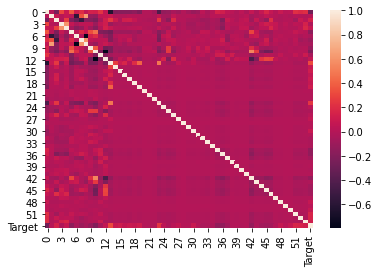

In [ ]:
# Plotting Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(forest_df.corr())
plt.show()

In [ ]:
# Splitting the Data into Train and Test set
train, validate, test = np.split(forest_df.sample(frac=1), [int(.6*len(forest_df)), int(.8*len(forest_df))])
y_train=train['Target']
y_val=validate['Target']
y_test=test['Target']
train.drop(columns={'Target'},axis='columns',inplace=True)
validate.drop(columns={'Target'},axis='columns',inplace=True)
test.drop(columns={'Target'},axis='columns',inplace=True)

In [ ]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
train=pd.DataFrame(s.fit_transform(train))
test=pd.DataFrame(s.fit_transform(test))
validate=pd.DataFrame(s.fit_transform(validate))

In [ ]:
# Preprocessing for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_train=pd.DataFrame(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
train.shape

(348607, 54)

In [ ]:
y_train.shape

(348607, 8)

In [ ]:
pip install h5py

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
filepath="best_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# NN Model for Forest Dataset
model=Sequential()
model.add(Dense(units=104, activation='relu', input_dim=54))
model.add(Dense(units=280, activation='relu'))
model.add(Dense(units=380, activation='relu'))
model.add(Dense(units=480, activation='relu'))
model.add(Dense(units=580, activation='relu'))
model.add(Dense(units=8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history=model.fit(train, y_train, epochs=20, verbose=1,batch_size=50,validation_data=(validate,y_val),callbacks=callbacks_list)

Epoch 1/20
6954/6973 [============================>.] - ETA: 0s - loss: 0.5728 - accuracy: 0.7528
Epoch 00001: val_loss improved from -inf to 0.48649, saving model to best_model.h5
6973/6973 [==============================] - 21s 3ms/step - loss: 0.5725 - accuracy: 0.7530 - val_loss: 0.4865 - val_accuracy: 0.7906
Epoch 2/20
6952/6973 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8247
Epoch 00002: val_loss did not improve from 0.48649
6973/6973 [==============================] - 20s 3ms/step - loss: 0.4121 - accuracy: 0.8248 - val_loss: 0.3642 - val_accuracy: 0.8463
Epoch 3/20
6956/6973 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8578
Epoch 00003: val_loss did not improve from 0.48649
6973/6973 [==============================] - 20s 3ms/step - loss: 0.3409 - accuracy: 0.8579 - val_loss: 0.3239 - val_accuracy: 0.8662
Epoch 4/20
6967/6973 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8753
Epoch 00004: val_loss

In [ ]:
model.evaluate(test,y_test)

3632/3632 [==============================] - 7s 2ms/step - loss: 0.1800 - accuracy: 0.9279


[0.17996631562709808, 0.9278934001922607]

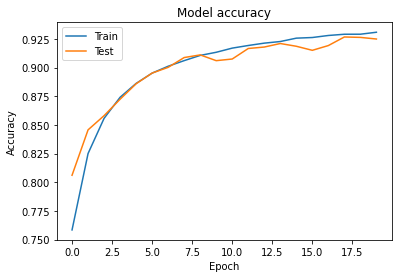

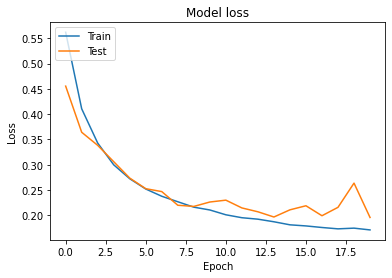

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
kddcupdf = datasets.fetch_kddcup99()
kddcup = pd.DataFrame(kddcupdf.data)
kddcup_target = pd.DataFrame(kddcupdf.target)

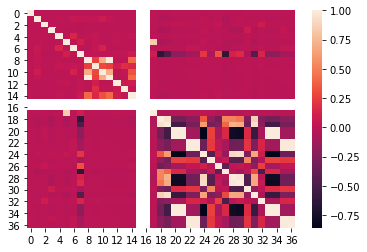

In [34]:
# Plotting Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(kddcup.corr())
plt.show()

In [13]:
kddcup_target.dtypes

0    object
dtype: object

In [7]:
kddcup.drop(kddcup.columns[0:4,],axis=1,inplace=True)

In [8]:
kddcup

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,9,9,1,0,0.11,0,0,0,0,0
1,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,19,19,1,0,0.05,0,0,0,0,0
2,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,0,1,0,0,29,29,1,0,0.03,0,0,0,0,0
3,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,39,39,1,0,0.03,0,0,0,0,0
4,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,49,49,1,0,0.02,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,1,0,0.4,86,255,1,0,0.01,0.05,0,0.01,0,0
494017,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,6,255,1,0,0.17,0.05,0,0.01,0,0
494018,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0,0,1,0,0.17,16,255,1,0,0.06,0.05,0.06,0.01,0,0
494019,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0,0,0,0,1,0,0.17,26,255,1,0,0.04,0.05,0.04,0.01,0,0


In [9]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
kddcup=pd.DataFrame(s.fit_transform(kddcup))

In [18]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
y = [i.decode('utf-8') for i in kddcupdf.target]
y1 = pd.DataFrame(lenc.fit_transform(y))
y2=to_categorical(y1)

In [25]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(kddcup, y2, test_size = 0.2)
X_val1, X_test1, y_val1, y_test1 = train_test_split(kddcup, y2, test_size = 0.3)

In [26]:
# Preprocessing for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [27]:
X_train1.shape

(395216, 37)

In [28]:
y_train1.shape

(395216, 23)

In [30]:
y_val1.shape

(345814, 23)

In [35]:
# NN Model for KDDCUP Dataset
model1=Sequential()
model1.add(Dense(units=104, activation='relu', input_dim=37))
model1.add(Dense(units=280, activation='relu'))
model1.add(Dense(units=380, activation='relu'))
model1.add(Dense(units=480, activation='relu'))
model1.add(Dense(units=580, activation='relu'))
model1.add(Dense(units=23, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model1.fit(X_train1, y_train1, epochs=10, verbose=1,batch_size=50,validation_data=(X_val1,y_val1))

Epoch 1/10
7905/7905 [==============================] - 41s 5ms/step - loss: 0.0187 - accuracy: 0.9957 - val_loss: 0.0076 - val_accuracy: 0.9985
Epoch 2/10
7905/7905 [==============================] - 41s 5ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.0092 - val_accuracy: 0.9973
Epoch 3/10
7905/7905 [==============================] - 40s 5ms/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9982
Epoch 4/10
7905/7905 [==============================] - 39s 5ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.0057 - val_accuracy: 0.9988
Epoch 5/10
7905/7905 [==============================] - 39s 5ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 6/10
7905/7905 [==============================] - 39s 5ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 7/10
7905/7905 [==============================] - 41s 5ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0067 - val_ac

In [36]:
model1.evaluate(X_test1,y_test1)

4632/4632 [==============================] - 11s 2ms/step - loss: 0.0093 - accuracy: 0.9988


[0.009285027161240578, 0.9988394379615784]

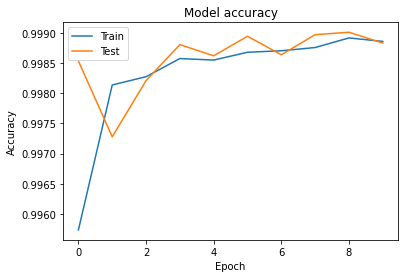

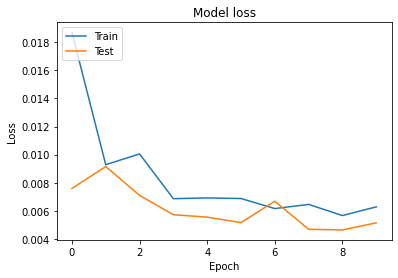

In [37]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn import datasets

In [ ]:
data_breast_cancer=datasets.load_breast_cancer()

In [ ]:
df_breastcancer = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)
df_breastcancer['Target']=data_breast_cancer['target']

In [ ]:
df_breastcancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# Splitting the Data into Train and Test set
train2, validate2, test2 = np.split(df_breastcancer.sample(frac=1), [int(.6*len(df_breastcancer)), int(.8*len(df_breastcancer))])
y_train2=train2['Target']
y_val2=validate2['Target']
y_test2=test2['Target']
train2.drop(columns={'Target'},axis='columns',inplace=True)
validate2.drop(columns={'Target'},axis='columns',inplace=True)
test2.drop(columns={'Target'},axis='columns',inplace=True)

In [ ]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
train2=pd.DataFrame(s.fit_transform(train2))
test2=pd.DataFrame(s.fit_transform(test2))
validate2=pd.DataFrame(s.fit_transform(validate2))

In [ ]:
# Preprocessing for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical
y_train2=to_categorical(y_train2)
y_val2=to_categorical(y_val2)
y_test2=to_categorical(y_test2)

In [ ]:
train2.shape

(341, 30)

In [ ]:
y_train2.shape

(341, 2)

In [ ]:
# NN Model for Breast Cancer Dataset
model2=Sequential()
model2.add(Dense(units=104, activation='relu', input_dim=30))
model2.add(Dense(units=280, activation='relu'))
model2.add(Dense(units=380, activation='relu'))
model2.add(Dense(units=480, activation='relu'))
model2.add(Dense(units=580, activation='relu'))
model2.add(Dense(units=2, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history2=model2.fit(train2, y_train2, epochs=50, verbose=1,batch_size=50,validation_data=(validate2,y_val2))

Epoch 1/50
7/7 [==============================] - 0s 27ms/step - loss: 0.6281 - accuracy: 0.7683 - val_loss: 0.4758 - val_accuracy: 0.8684
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3266 - accuracy: 0.9003 - val_loss: 0.2226 - val_accuracy: 0.9035
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1701 - accuracy: 0.9238 - val_loss: 0.3030 - val_accuracy: 0.9123
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1383 - accuracy: 0.9326 - val_loss: 0.1828 - val_accuracy: 0.9386
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9560 - val_loss: 0.1520 - val_accuracy: 0.9737
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9765 - val_loss: 0.1636 - val_accuracy: 0.9561
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0766 - accuracy: 0.9677 - val_loss: 0.2341 - val_accuracy: 0.9035
Epoch 8/50
7/7 [=================

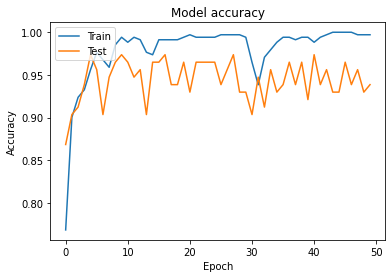

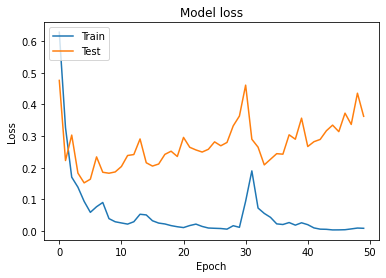

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn import datasets
wine=datasets.load_wine()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Target']=wine['target']

In [ ]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


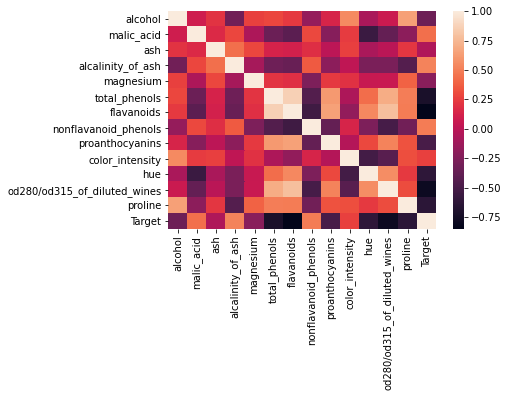

In [ ]:
# Plotting the Heatmap
import seaborn as sns
sns.heatmap(df_wine.corr())
plt.show()

In [ ]:
# Splitting the Data into Train and Test set
train3, validate3, test3 = np.split(df_wine.sample(frac=1), [int(.6*len(df_wine)), int(.8*len(df_wine))])
y_train3=train3['Target']
y_val3=validate3['Target']
y_test3=test3['Target']
train3.drop(columns={'Target'},axis='columns',inplace=True)
validate3.drop(columns={'Target'},axis='columns',inplace=True)
test3.drop(columns={'Target'},axis='columns',inplace=True)

In [ ]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
train3=pd.DataFrame(s.fit_transform(train3))
test3=pd.DataFrame(s.fit_transform(test3))
validate3=pd.DataFrame(s.fit_transform(validate3))

In [ ]:
# Preprocessing for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical
y_train3=to_categorical(y_train3)
y_val3=to_categorical(y_val3)
y_test3=to_categorical(y_test3)

In [ ]:
train3.shape

(106, 13)

In [ ]:
y_train3.shape

(106, 3)

In [ ]:
# NN Model for Wine Dataset
model3=Sequential()
model3.add(Dense(units=104, activation='relu', input_dim=13))
model3.add(Dense(units=280, activation='relu'))
model3.add(Dense(units=180, activation='relu'))
model3.add(Dense(units=1480, activation='relu'))
model3.add(Dense(units=580, activation='relu'))
model3.add(Dense(units=3, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history3=model3.fit(train3, y_train3, epochs=150, verbose=1,batch_size=50,validation_data=(validate3,y_val3))

Epoch 1/150
3/3 [==============================] - 0s 58ms/step - loss: 1.0562 - accuracy: 0.5377 - val_loss: 0.9222 - val_accuracy: 0.5556
Epoch 2/150
3/3 [==============================] - 0s 7ms/step - loss: 0.8140 - accuracy: 0.7925 - val_loss: 0.6942 - val_accuracy: 0.8056
Epoch 3/150
3/3 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.8774 - val_loss: 0.4263 - val_accuracy: 0.9167
Epoch 4/150
3/3 [==============================] - 0s 7ms/step - loss: 0.2600 - accuracy: 0.9340 - val_loss: 0.2810 - val_accuracy: 0.9444
Epoch 5/150
3/3 [==============================] - 0s 7ms/step - loss: 0.1187 - accuracy: 0.9623 - val_loss: 0.2713 - val_accuracy: 0.9167
Epoch 6/150
3/3 [==============================] - 0s 8ms/step - loss: 0.0430 - accuracy: 0.9906 - val_loss: 0.3381 - val_accuracy: 0.9444
Epoch 7/150
3/3 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.2819 - val_accuracy: 0.9167
Epoch 8/150
3/3 [=========

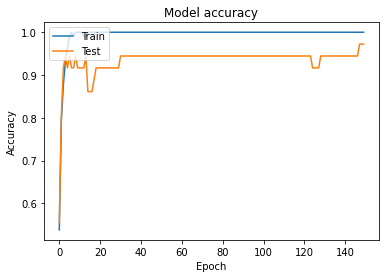

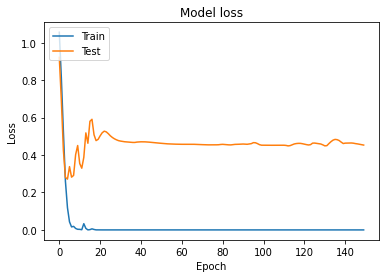

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()